# Tarea 1

Tecnicas de preprocesado
- Juntar fecha y hora en una solo columna como tipo Datetime, ya que este los lee como texto.
- Analizando la longitud y la latitud hay varios valores erroneos, estos se podrian eliminar o tratar de arreglar.
- Se podria sacar una clasificacion a partir de la columna de origen.
- Se podria normalizar la magnitud
- Se podria normalizar la profundidad y latutudes, ya que estos tienen unidades distintas

EDAS de interez
- Numero de sismos por anno (histogramas)
- Numero de sismos por clasificacion (gráficos de barras o pie bar)
- Posicion (diagramas de dispersión)
- Magnitud vs Origen (boxplots)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
path = "https://raw.githubusercontent.com/Rickbi/AA-1/refs/heads/main/ovsicori_sismicidad_anual.csv"
df = pd.read_csv(path)

In [13]:
df

,Fecha,Hora Local,Magnitud,Profundidad en km,Localizacion,Origen,Reportado,Latitud,Longitud
0,2009-12-28,03:37:00,2.0,4.0,Cercano al V. Turrialba,Fallamiento Local,Heredia,10.0270,-83.7730
1,2009-12-17,15:13:00,4.0,30.0,15 kms al noroeste de San Isidro del General,tectÃ³nico por fallamiento local,Zona Sur,9.4800,-83.7800
2,2009-12-16,07:18:00,3.1,40.0,12 kms al noreste de Parrita,tectÃ³nico por subducciÃ³n,Heredia,9.5500,-84.2100
3,2009-12-02,06:45:00,2.9,8.0,15 km al norte de San Isidro de Perez Zeledon,Fallamiento local,Palmital de Perez Zeledon,9.5170,-83.6800
4,2009-11-26,15:04:00,4.5,20.0,44 km Sur Este de Limon,Cinturon deformado del norte de Panama,Puerto Viejo y Talamanca,9.6470,-82.8700
...,...,...,...,...,...,...,...,...,...
2497,2025-01-09,08:13:27,3.8,17.0,13 km Sur Oeste de Playa Corcovado. Península ...,Subducción,"Paso Canoas, Sirena, Corcovado",8.4426,-83.7377
2498,2025-01-05,11:18:48,6.0,25.0,"21 km al suroeste de El Zapote, El Salvador.",Tectónico por subducción.,"Filadelfia, Nosara, Chomes, San Ramón, Naranjo...",13.1131,-88.9638
2499,2025-01-02,07:29:43,4.2,30.0,"25 km al sureste de Puerto Armuelles, Panamá.",Tectónico en la Zona de Fracturas de Panamá,"Caracol, Laurel y Paso Canoas",8.0555,-82.7715
2500,2026-01-06,09:19:47,4.1,32.0,13 km al norte de Quepos,Subduccion,"San Jose, Acosta,Desamparados, Alajuelita, Pav...",9.5460,-84.1747


In [46]:
fechas_horas = df["Fecha"] + " " + df["Hora Local"]
fechas_horas = pd.to_datetime(fechas_horas, format="%Y-%m-%d %H:%M:%S")
fechas_horas.dt.hour

0        3
1       15
2        7
3        6
4       15
        ..
2497     8
2498    11
2499     7
2500     9
2501     5
Length: 2502, dtype: int32

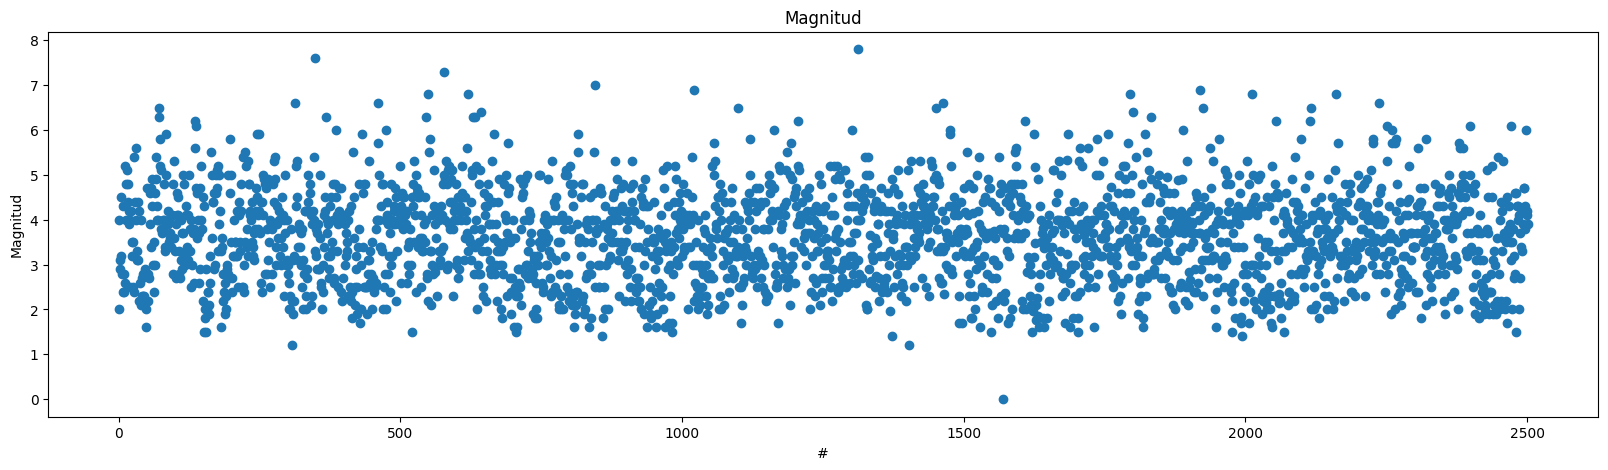

In [58]:
plt.figure(figsize=(20, 5))

x = [i for i in range(2502)]
y = df.Magnitud

plt.scatter(x, df["Magnitud"])
plt.xlabel("#")
plt.ylabel("Magnitud")
plt.title("Magnitud")
plt.show()



In [79]:
df.Magnitud.min(), df.Magnitud.max()

(np.float64(0.0), np.float64(7.8))

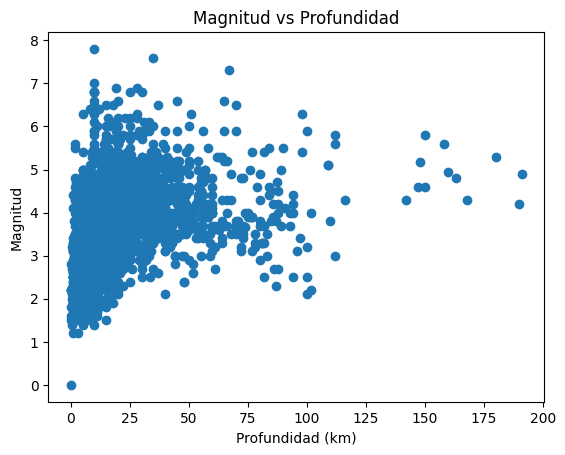

In [54]:
plt.scatter(df["Profundidad en km"], df["Magnitud"])
plt.xlabel("Profundidad (km)")
plt.ylabel("Magnitud")
plt.title("Magnitud vs Profundidad")
plt.show()

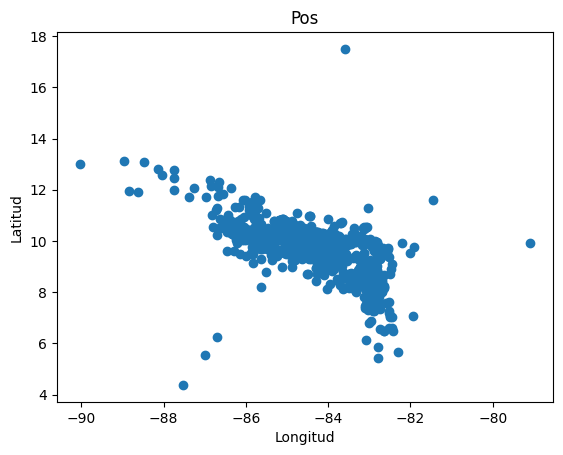

In [77]:
#plt.figure(figsize=(20, 5))

plt.scatter(df.Longitud, df.Latitud)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Pos")
plt.show()

In [61]:
df.Longitud.min(), df.Longitud.max()

(np.float64(-849840.0), np.float64(86.2865))

In [62]:
df.Latitud.min(), df.Latitud.max()

(np.float64(4.38), np.float64(17.5))

In [72]:
print(df.Longitud.mean())
print(df.Longitud.median())


-83.99055163868904
-84.05924999999999


In [75]:
df.loc[df.Longitud > 0, "Longitud"] *= -1